coefficient of determination :  0.24456688961685802
slope :  [74.14307112]
intercept :  -23.01449070317839


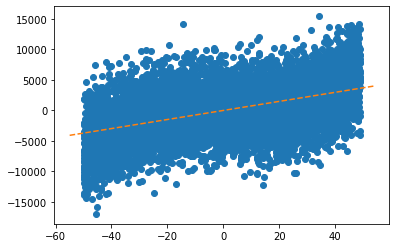

In [1]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import numpy as np
import pickle

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, '--')

inline = open('./data/train.pkl','rb')
data = pickle.load(inline,encoding='bytes')
temp_x = []
temp_y = []
for i in data:
    temp_x.append(i[0])
    temp_y.append(i[1])

x = np.array(temp_x).reshape(-1,1)
y = np.array(temp_y)

reg = LinearRegression().fit(x, y)
print('coefficient of determination : ' ,reg.score(x, y))
print("slope : " ,reg.coef_)
print("intercept : " ,reg.intercept_)

plt.plot(temp_x,temp_y,'o')
abline(reg.coef_,reg.intercept_)
plt.show()

In [2]:
import random
inline2 = open('../Linear-Regression/data/test.pkl','rb')
data2 = pickle.load(inline2,encoding='bytes')
var = list(range(len(data)))
random.shuffle(var)
packets = len(data)/10
temp_test_x = []
temp_test_y = []
resampled_x = []
resampled_y = []
temp_kx = []
temp_ky = []
z = 0

for i in var:
    if((z+1)%packets == 0):
        temp_kx.append(data[i][0])
        temp_ky.append(data[i][1])
        resampled_x.append(temp_kx)
        resampled_y.append(temp_ky)
        temp_ky = []
        temp_kx = []
    else:
        temp_kx.append(data[i][0])
        temp_ky.append(data[i][1])
    z+=1

for i in data2 : 
    temp_test_x.append(i[0])
    temp_test_y.append(i[1])
    
print(var)
print("Resampled X : \n" + str(resampled_x))
print("Resampled Y : \n" + str(resampled_y))

[2189, 4312, 7321, 311, 1291, 7878, 5486, 2597, 3724, 5113, 4817, 4908, 405, 2847, 5694, 6297, 2644, 7257, 226, 2614, 6269, 7606, 6813, 1402, 5706, 5385, 633, 7998, 6361, 6736, 1095, 4405, 7724, 2406, 1061, 831, 1336, 2810, 4836, 6459, 117, 5144, 3049, 1706, 2138, 2612, 4985, 5436, 5437, 759, 3989, 4893, 816, 5931, 4964, 7146, 736, 580, 7412, 4061, 3867, 7442, 4043, 6552, 1908, 2949, 7602, 6064, 3207, 1877, 2655, 4223, 374, 7987, 4803, 2917, 560, 6182, 3920, 2667, 31, 125, 7700, 6928, 1222, 2521, 5849, 7521, 6198, 3884, 3201, 194, 383, 7663, 7801, 7091, 6521, 475, 1167, 1589, 7853, 4288, 2503, 2408, 5888, 6556, 6334, 2575, 6332, 826, 5585, 2733, 2340, 6953, 7255, 3755, 1365, 1338, 6273, 3815, 5461, 1612, 3553, 2961, 894, 2376, 3174, 6393, 2650, 7620, 1130, 2562, 6879, 5390, 4810, 6309, 2685, 6068, 2554, 6601, 5609, 6841, 6622, 7213, 7519, 370, 112, 6540, 1088, 5953, 667, 4721, 1055, 196, 6643, 6034, 3387, 3440, 4522, 4433, 742, 3923, 152, 5954, 983, 1830, 7921, 2541, 5850, 6173, 5820, 

In [3]:
from sklearn.preprocessing import PolynomialFeatures
import math

x = np.array(temp_x).reshape(-1,1)
y = np.array(temp_y)

temp_test_x2 = np.array(temp_test_x).reshape(-1,1)

mean_bias = []
squared_mean_bias = []
mean_variance = []
total_polynomials = 20
total_error = []
# irreduceble_error = []

for i in range(1,total_polynomials+1):        # Polynomial loop
    poly_bias = []
    val_mean = 0
    val_squared_mean = 0
    val_variance = 0
    temp_total_error = 0
    bias = [0 for k in range(1,total_polynomials+1)]
    for j in range(0,10):       # test case loop
        abc = np.array(resampled_x[j]).reshape(-1,1)
        poly_reg = PolynomialFeatures(degree=i)
        X_poly = poly_reg.fit_transform(abc)
        # poly_reg.fit(X_poly,y)
        # print("i : " + str(i) + " | j : "+ str(j))
        lin_reg = LinearRegression().fit(X_poly,resampled_y[j])
        # plt.plot(temp_test_x2, lin_reg.predict(poly_reg.fit_transform(temp_test_x2)),'o')
        predicted_value = lin_reg.predict(poly_reg.fit_transform(temp_test_x2))
        poly_bias.append(predicted_value)
    # finding bias below :
    for j in range(0,len(poly_bias[0])):
        temp = 0
        for k in range(0,10):
            temp += poly_bias[k][j]
        temp = temp/10
        for k in range(0,10):
            val_squared_mean +=  math.pow((temp - temp_test_y[j]),2)
            val_mean += abs(temp - temp_test_y[j])
    val_mean = val_mean/len(poly_bias[0])
    val_squared_mean = val_squared_mean/len(poly_bias[0])
    mean_bias.append(val_mean/10)
    squared_mean_bias.append(val_squared_mean/10)
    # variance finding down :
    for j in range(0,len(poly_bias[0])):
        temp = 0
        for k in range(0,10):
            temp += poly_bias[k][j]
        temp = temp/10
        for k in range(0,10):
            val_variance +=  math.pow((temp - poly_bias[k][j]),2)
    val_variance = val_variance/len(poly_bias[0])
    mean_variance.append(val_variance/10)
    # total error below :
    for j in range(0,len(temp_test_y)):
        for k in range(0,10):
            temp_total_error += math.pow(temp_test_y[j] - poly_bias[k][j],2)
    temp_total_error = temp_total_error/len(poly_bias[0])
    total_error.append(temp_total_error/10)
        
irreduceble_error = [(total_error[i] - squared_mean_bias[i] - mean_variance[i]) for i in range(0,total_polynomials)]
print("\x1b[6;30;46m"+"Mean Bias : " + "\x1b[0m" + "\n",mean_bias)
print("\x1b[6;30;46m"+"Squared Mean Bias : " + "\x1b[0m" + "\n",squared_mean_bias)
print("\x1b[6;30;46m"+"Mean Variance : " + "\x1b[0m" + "\n",mean_variance)
print("\x1b[6;30;46m"+"Total Error : " + "\x1b[0m" + "\n",total_error)
print("\x1b[6;30;46m"+"Irreduceble Error : " + "\x1b[0m" + "\n",irreduceble_error)

Mean Bias : 
 [820.1274029682196, 811.5730310058455, 67.20494330902764, 77.24739410735778, 76.98315532066735, 75.46431283880787, 81.89558694700833, 83.87197593851022, 83.224022338467, 88.26058120838228, 86.28055147245456, 116.12440103896374, 90.44937505320748, 126.8661984242414, 161.12265463089085, 166.63644820555805, 232.54036599126349, 233.89677351607446, 304.1232994472372, 302.1961271492279]
Squared Mean Bias : 
 [1002820.7373924423, 957602.7232446547, 9222.011100938753, 9105.739204482545, 8502.275119171034, 8056.320955240507, 9718.849194601436, 9827.724037967462, 9843.063324065837, 12070.903429738773, 12263.195697483196, 31297.25183006943, 18001.39250766574, 45683.96754091663, 71834.52067026167, 83673.21495530682, 128274.193335338, 139417.76473470865, 207274.60500429882, 218748.01263728816]
Mean Variance : 
 [23731.01464687495, 70214.29003169124, 57949.96115114641, 70522.4381610456, 81445.51638642991, 90865.21613854464, 100371.24692962335, 132803.85460543976, 150769.81287848824, 16

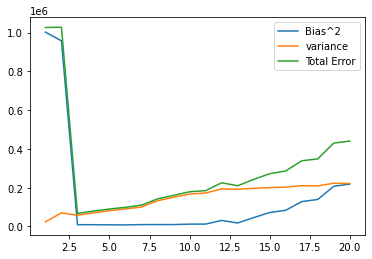

In [4]:
plt.plot([i for i in range(1,total_polynomials + 1)],squared_mean_bias,label='Bias^2')
plt.plot([i for i in range(1,total_polynomials + 1)],mean_variance,label='variance')
plt.plot([i for i in range(1,total_polynomials + 1)],total_error,label='Total Error')
plt.legend()
# plt.plot(temp_test_x2, lin_reg.predict(poly_reg.fit_transform(temp_test_x2)),'o', color='red')
# abline(reg.coef_,reg.intercept_)
plt.show()